In [2]:
#importing libraraies required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#reading the file
url = "http://bit.ly/w-data"   #this is the dataset of the given problem
df = pd.read_csv(url)          #reading the csv file


In [4]:
df.head()  #show value of top 5 data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
print(df.shape)  #printing the shape of the Data frame

(25, 2)


In [6]:
print(df.info())    #info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


In [7]:
x = df.iloc[:, :-1].values   #input value
y = df.iloc[:, 1].values     #target value

In [8]:
print(x.shape,y.shape)

(25, 1) (25,)


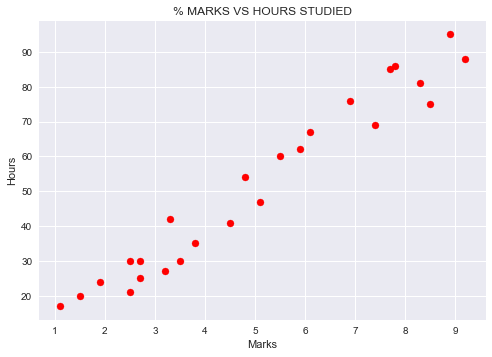

In [9]:
#ploting the graph
plt.style.use("seaborn")
plt.scatter(x,y,color = "red")
plt.title("% MARKS VS HOURS STUDIED")
plt.xlabel('Marks')
plt.ylabel('Hours')
plt.show()


In [10]:
#Splitting the data in training and testing
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


In [12]:
#linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(x_train,y_train)  #fitting the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [13]:
#predicting the value
y_pred = lr.predict(x_test)
print(y_pred)

[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


In [14]:
# Plotting the regression line
coefficient = lr.coef_
intercept  = lr.intercept_

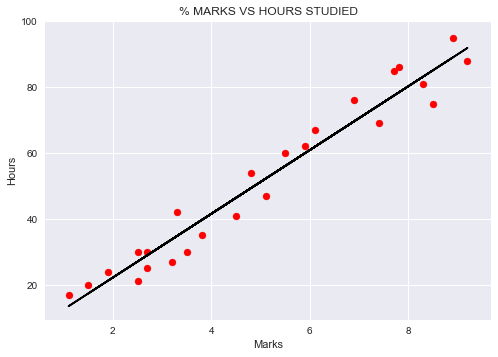

In [15]:
# Formula of line is y = m*x + c
line = coefficient*x + intercept

plt.style.use("seaborn")
plt.plot(x,line,color = 'black')
plt.scatter(x,y,color = "red")
plt.title("% MARKS VS HOURS STUDIED")
plt.xlabel('Marks')
plt.ylabel('Hours')
plt.show()

In [16]:
data = pd.DataFrame({"Actual Data": y_test,
                     "Predicted Data": y_pred})
print(data)

   Actual Data  Predicted Data
0           81       83.188141
1           30       27.032088
2           21       27.032088
3           76       69.633232
4           62       59.951153


In [17]:
pred = lr.predict([[9.25]])
print("Predicted Score = {}".format(pred[0]))

Predicted Score = 92.38611528261495


In [18]:
from sklearn import metrics  
error = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:{}'.format(error))


Mean Absolute Error:3.920751190209927
